# Elliot Galvis
### Book Challenge Data Description / Visualization / Stats Overview

#### Imports Libraries

In [2]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

# Word cloud visualization
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

#### Imports the dataset from my CSV file

In [3]:
all_titles_df = pd.read_csv("All-Book-Titles-for-Data-Vis.csv")
corpus_df = pd.read_csv("Corpus-Titles-for-Data-Vis.csv")

/var/folders/ng/pmj55lc51h904z3zf6sth7bc0000gn/T/ipykernel_10089/1122584236.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  all_titles_df = pd.read_csv("All-Book-Titles-for-Data-Vis.csv")


### Shows the basic layout of my dataset, including the 10876 examples, 112 features (including 32 dichotomous challenge tag labels), and their datatypes

In [4]:
all_titles_df.describe()

,# Cases since 2010,Booklooks/RatedBooks Rating,Abortion,Anti-Family,Body Description or Function,Death,Defies Authority,Drugs,EDI Content,Grammar,...,Count SD,Count TN,Count TX,Count UT,Count VA,Count VT,Count WA,Count WI,Count WV,Count WY
count,10876.000000,564.000000,10876.000000,10876.000000,10876.000000,10876.000000,4762.000000,10876.000000,10876.000000,10876.000000,...,10876.000000,10876.000000,10876.000000,10876.000000,10876.000000,10876.000000,10876.000000,10876.000000,10876.000000,10876.000000
mean,3.223612,2.523050,0.004505,0.022251,0.001563,0.000919,0.006720,0.033008,0.005793,0.000368,...,0.008183,0.064178,0.713590,0.057098,0.100129,0.005333,0.049467,0.081280,0.006804,0.013056
std,10.221493,1.204418,0.066973,0.147505,0.039507,0.030310,0.081707,0.178667,0.075892,0.019175,...,0.125129,0.313556,1.823697,0.398335,0.491019,0.090815,0.294531,0.407307,0.098493,0.137011
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,408.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,7.000000,34.000000,10.000000,15.000000,4.000000,8.000000,11.000000,2.000000,3.000000


### Here, I provide the summary statistics for number of challenges of title during this fourteen-year period

In [5]:
all_titles_df["# Cases since 2010"].describe()

count    10876.000000
mean         3.223612
std         10.221493
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        408.000000
Name: # Cases since 2010, dtype: float64

### Note: As we can see, the median and minimum number of times individual titles are challenged from 2010-2023 are only 1 time, while the mean (indicating a rightward skew to the distribution) is 3.22 times and the max is 408 times

### The below shows the first 10 titles in the dataframe to give an overview of the data structure and show the data for the 10 most challenged books during this period

In [7]:
all_titles_df.drop(['ISBN'], axis=1).sort_values(by="# Cases since 2010", ascending=False).head(10)

,Full Title,Author(s),# Cases since 2010,Booklooks/RatedBooks Rating,Type of Material,Fiction/NonFiction,Age Group,Publisher,Publication Year,OCLC Tag,...,Count SD,Count TN,Count TX,Count UT,Count VA,Count VT,Count WA,Count WI,Count WV,Count WY
0,Gender Queer: A Memoir,Maia Kobabe,408,4.0,Graphic Novel/Comic,Non-Fiction,Young Adult,Oni Press,2019.0,LGBTQIA+,...,1,3,34,3,15,3,8,10,0,3
1,All Boys Aren't Blue: A Memoir-Manifesto,George M. Johnson,249,4.0,Book,Non-Fiction,Young Adult,Penguin Books,2021.0,BIPOC/LGBTQIA+,...,1,3,30,4,7,0,5,6,0,0
2,The Bluest Eye,Toni Morrison,239,4.0,Book,Fiction,Adult,Plume Book,1994.0,BIPOC Fiction,...,0,4,28,10,8,0,3,3,1,0
3,The Perks of Being a Wallflower,Stephen Chbosky,190,4.0,Book,Fiction,Young Adult,Pocket Books,1999.0,LGBTQIA+,...,4,6,25,8,7,0,1,5,0,2
4,The Absolutely True Diary of a Part-Time Indian,Sherman Alexie,181,2.0,Book,Fiction,Young Adult,"Little, Brown",2007.0,BIPOC Fiction,...,1,2,13,9,4,0,2,6,1,0
5,It's Perfectly Normal,Robie H. Harris,171,3.0,Book,Non-Fiction,Children,Candlewick Press,1994.0,NaN,...,1,5,25,3,7,3,3,6,1,0
6,Looking for Alaska,John Green,165,3.0,Book,Fiction,Young Adult,Dutton Books,2005.0,NaN,...,0,7,14,6,7,0,1,6,0,1
7,This Book is Gay,Juno Dawson,161,4.0,Book,Non-Fiction,Young Adult,Sourcebooks,2015.0,LGBTQIA+,...,2,3,11,1,4,0,2,6,0,3
8,Flamer,Mike Curato,158,3.0,Graphic Novel/Comic,Fiction,Young Adult,St. Martin's Press,2020.0,LGBTQIA+,...,2,5,24,3,4,0,0,7,0,1
9,Lawn Boy,Jonathan Evison,155,3.0,Book,Fiction,Young Adult,Algonquin Books of Chapel Hill,2018.0,BIPOC Fiction,...,0,2,25,4,9,0,1,5,0,0


#### Checks for missing values and the percentage of each feature with null values. Displays those  features in ranked order of what percentage of examples' values for those features are null.

In [17]:
total = all_titles_df.isnull().sum().sort_values(ascending=False)
percent_1 = all_titles_df.isnull().sum()/all_titles_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(12)

,Total,%
Booklooks/RatedBooks Rating,10312,94.8
OCLC Tag,8737,80.3
Subjects,7992,73.5
Defies Authority,6114,56.2
Specific complaint,5567,51.2
Age Group,4753,43.7
ISBN,4223,38.8
Publisher,4189,38.5
Fiction/NonFiction,3694,34.0
Description,3595,33.1


## The below barcharts help give a better understanding of the distribution of the titles dataset according to categorical features

[Text(0, 0, '770'), Text(0, 0, '10106')]

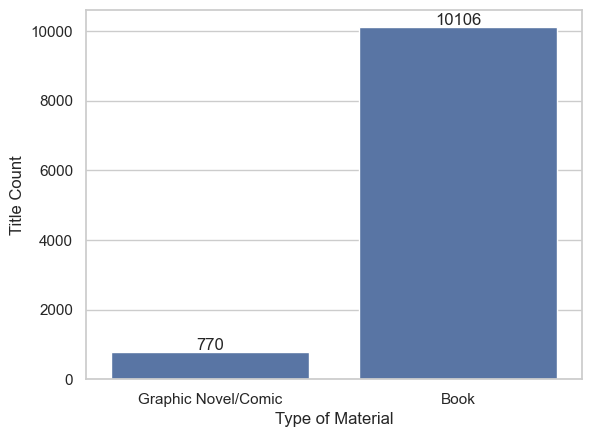

In [18]:
df = all_titles_df

categories = [df['Type of Material'] == "Book", df['Type of Material'] == "Graphic Novel/Comic"]
counts = [df["Type of Material"].value_counts()["Book"], df["Type of Material"].value_counts()["Graphic Novel/Comic"]]
        
df["Title Count"] = np.select(categories, counts, default=0)
    
plot = sns.barplot(x='Type of Material', y="Title Count", data=df)
plot.bar_label(plot.containers[0])

[Text(0, 0, '1718'), Text(0, 0, '5464')]

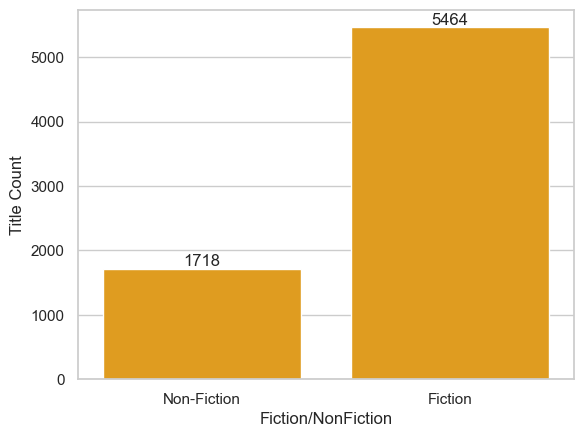

In [19]:
df = all_titles_df

categories = [df['Fiction/NonFiction'] == "Fiction", df['Fiction/NonFiction'] == "Non-Fiction"]
counts = [df["Fiction/NonFiction"].value_counts()["Fiction"], df["Fiction/NonFiction"].value_counts()["Non-Fiction"]]
        
df["Title Count"] = np.select(categories, counts, default=0)
plot = sns.barplot(x='Fiction/NonFiction', y='Title Count', color="orange", data=all_titles_df)
plot.bar_label(plot.containers[0])

[Text(0, 0, '3526'), Text(0, 0, '813'), Text(0, 0, '1784')]

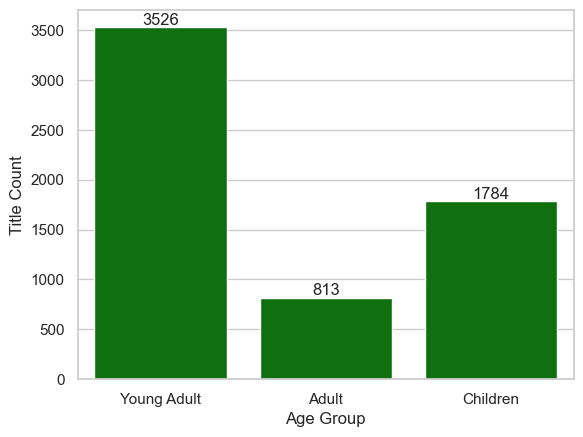

In [20]:
df = all_titles_df

categories = [df['Age Group'] == "Young Adult", df['Age Group'] == "Adult", df['Age Group'] == "Children"]
counts = [df["Age Group"].value_counts()["Young Adult"], df["Age Group"].value_counts()["Adult"], df["Age Group"].value_counts()["Children"]]

df["Title Count"] = np.select(categories, counts, default=0)
plot = sns.barplot(x='Age Group', y='Title Count', color='green', data=df)
plot.bar_label(plot.containers[0])

### The below code provides a pie chart of ALA-assigned tags to show the distributions of labeled titles across each tag

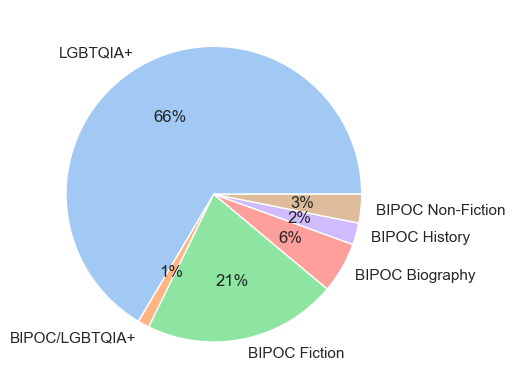

In [21]:
df = all_titles_df

categories = ["LGBTQIA+", "BIPOC/LGBTQIA+", "BIPOC Fiction", "BIPOC Biography", "BIPOC History", "BIPOC Non-Fiction"]
counts = [df["OCLC Tag"].value_counts()["LGBTQIA+"], df["OCLC Tag"].value_counts()["BIPOC/LGBTQIA+"], df["OCLC Tag"].value_counts()["BIPOC Fiction"], df["OCLC Tag"].value_counts()["BIPOC Biography"], df["OCLC Tag"].value_counts()["BIPOC History"], df["OCLC Tag"].value_counts()["BIPOC Non-Fiction"]]

palette_color = sns.color_palette('pastel') 

plt.pie(counts, labels=categories, colors=palette_color, autopct='%.0f%%') 
plt.savefig('3-4a.png', bbox_inches='tight')
plt.show()

### When we check our assignment of ALA tag numerals above and consult this visualization, we can see that titles labeled LGBTQIA+ without being BIPOC/LGBTQIA+ are targeted by far the most frequently compared to the other tagged titles (almost 3 times as much as all the rest combined, and roughly four times as much as the next closest tag), followed by titles tagged as BIPOC Fiction.

### We can also see from the multi-variable barplot below that there are far fewer graphic narratives challenged that have been classified as for "Adults" or "Children" compared to those for "Young Adults", and that the most frequently recurring audience for challenged titles are "Young Adults". 

### Note: One problem to consider in these classifications of the titles is that many of the "Books" for "Children" could be argued to be classified as "Graphic Novels" given they too are primarily composed of illustrations and captions. This demonstrates the shortcomings of the classification features as set out in the dataset.

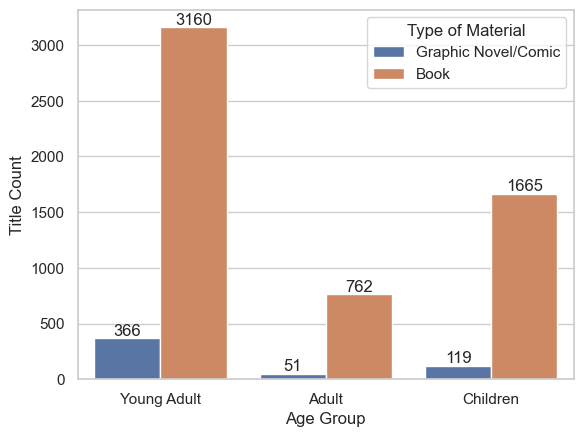

In [22]:
df = all_titles_df
books_df = df[df["Type of Material"] == "Book"]
gnc_df = df[df["Type of Material"] == "Graphic Novel/Comic"]

categories = [(df['Age Group'] == "Young Adult") & (df['Type of Material'] == "Book"), 
              (df['Age Group'] == "Young Adult") & (df['Type of Material'] == "Graphic Novel/Comic"),
              (df['Age Group'] == "Adult") & (df['Type of Material']== "Book"), 
              (df['Age Group'] == "Adult") & (df['Type of Material'] == "Graphic Novel/Comic"),
              (df['Age Group'] == "Children") & (df['Type of Material']== "Book"),
              (df['Age Group'] == "Children") & (df['Type of Material']== "Graphic Novel/Comic")]

counts = [books_df["Age Group"].value_counts()["Young Adult"], 
          gnc_df["Age Group"].value_counts()["Young Adult"],
          books_df["Age Group"].value_counts()["Adult"], 
          gnc_df["Age Group"].value_counts()["Adult"],
          books_df["Age Group"].value_counts()["Children"],
          gnc_df["Age Group"].value_counts()["Children"]]

df["Title Count"] = np.select(categories, counts, default=0)
graph = sns.barplot(df, x="Age Group", y="Title Count", hue="Type of Material")
for i in graph.containers:
    graph.bar_label(i,)

### The below code generates a wordcloud of the "Specific complaint" field to give us a crude understanding of the words associated with book challenges over the fourteen-year period. We can infer that many challengers are concerned with issues of sexuality and visual imagery (characterized with "pornographic") in relation to "children" and "minors". This matches with the explicit intentions of challenge groups like Moms for Liberty and the preliminary analysis of groups like the ALA.

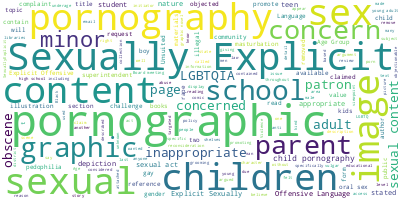

In [23]:
def create_wordcloud(text):
    #mask = np.array(Image.open("cloud.jpeg"))
    stopwords = set(STOPWORDS)
    stopwords.update(set(["book", "library", "said", "n", "material", "s", "Sexually Explicit"]))
    wc = WordCloud(background_color="white",
    #mask = mask,
    max_words=3000,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    path="wc.png"
    display(Image.open(path))
    
create_wordcloud(all_titles_df["Specific complaint"].values)

### I include the below heatmap of the  Challenge Tag features to show that none of the tags can fully substitute for another. I.e. a title being challenged on the basis of being "LGBTQIA" does not mean that it will be challenged on the basis of being "Sexually Explicit" (or any other tag), and vice versa. This is helpful to consider in my next notebook when thinking about feature reduction to simplify my predictive ML algorithms.

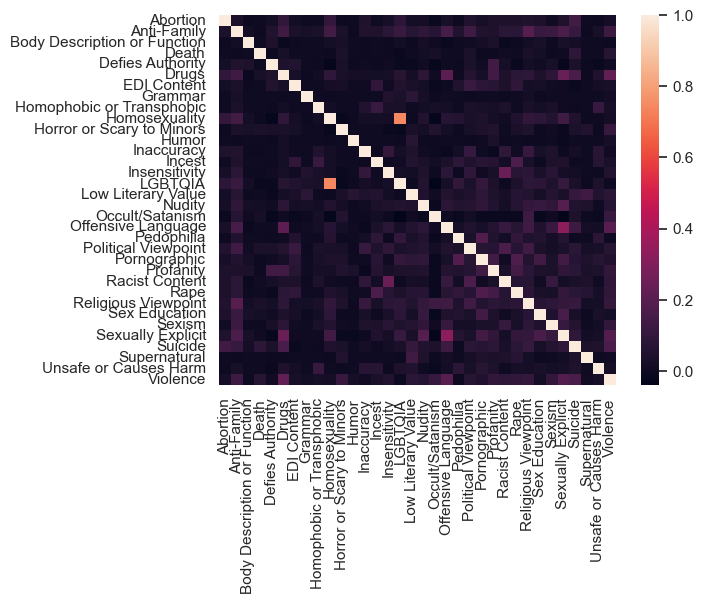

In [24]:
 tags_df = all_titles_df[['Abortion',
       'Anti-Family', 'Body Description or Function',
       'Death', 'Defies Authority', 'Drugs',
       'EDI Content', 'Grammar', 'Homophobic or Transphobic',
       'Homosexuality', 'Horror or Scary to Minors',
       'Humor', 'Inaccuracy', 'Incest', 'Insensitivity',
       'LGBTQIA', 'Low Literary Value', 'Nudity',
       'Occult/Satanism', 'Offensive Language', 'Pedophilia',
       'Political Viewpoint', 'Pornographic', 'Profanity', 'Racist Content',
       'Rape', 'Religious Viewpoint', 'Sex Education',
       'Sexism', 'Sexually Explicit', 'Suicide',
       'Supernatural', 'Unsafe or Causes Harm', 'Violence']]

sns.heatmap(tags_df.corr(), yticklabels=True, xticklabels=True)
plt.show()

[Text(0, 0, '10239'), Text(0, 0, '637')]

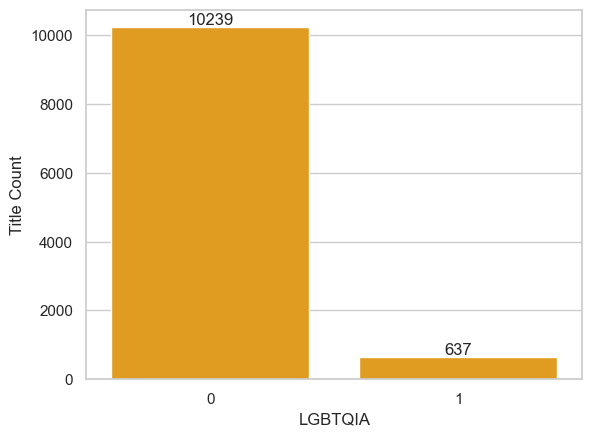

In [25]:
df = all_titles_df

categories = [df['LGBTQIA'] == 0, df['LGBTQIA'] == 1]
counts = [df["LGBTQIA"].value_counts()[0], df["LGBTQIA"].value_counts()[1]]
        
df["Title Count"] = np.select(categories, counts, default=0)
plot = sns.barplot(x='LGBTQIA', y='Title Count', color="orange", data=all_titles_df)
plot.bar_label(plot.containers[0])

[Text(0, 0, '9099'), Text(0, 0, '1777')]

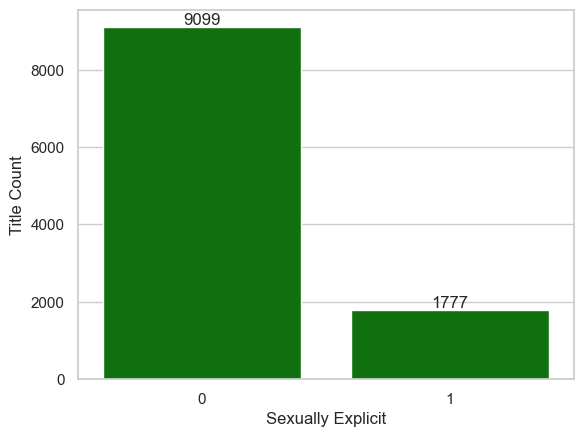

In [26]:
df = all_titles_df

categories = [df['Sexually Explicit'] == 0, df['Sexually Explicit'] == 1]
counts = [df["Sexually Explicit"].value_counts()[0], df["Sexually Explicit"].value_counts()[1]]
        
df["Title Count"] = np.select(categories, counts, default=0)
plot = sns.barplot(x='Sexually Explicit', y='Title Count', color="green", data=all_titles_df)
plot.bar_label(plot.containers[0])

[Text(0, 0, '9520'), Text(0, 0, '1356')]

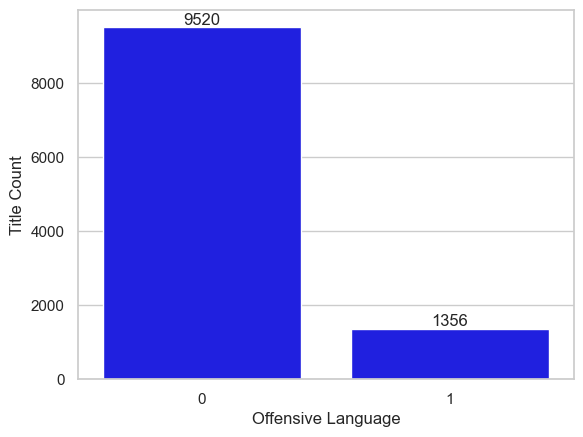

In [27]:
df = all_titles_df

categories = [df['Offensive Language'] == 0, df['Offensive Language'] == 1]
counts = [df["Offensive Language"].value_counts()[0], df["Offensive Language"].value_counts()[1]]
        
df["Title Count"] = np.select(categories, counts, default=0)
plot = sns.barplot(x='Offensive Language', y='Title Count', color="blue", data=all_titles_df)
plot.bar_label(plot.containers[0])

In [28]:
df = all_titles_df
challenge_tags = ['Abortion',
       'Anti-Family', 'Body Description or Function',
       'Death', 'Defies Authority', 'Drugs',
       'EDI Content', 'Grammar', 'Homophobic or Transphobic',
       'Horror or Scary to Minors',
       'Humor', 'Inaccuracy', 'Incest', 'Insensitivity',
       'LGBTQIA', 'Low Literary Value', 'Nudity',
       'Occult/Satanism', 'Offensive Language', 'Pedophilia',
       'Political Viewpoint', 'Pornographic', 'Profanity', 'Racist Content',
       'Rape', 'Religious Viewpoint', 'Sex Education',
       'Sexism', 'Sexually Explicit', 'Suicide',
       'Supernatural', 'Unsafe or Causes Harm', 'Violence']
counts = []
for tag in challenge_tags:
    counts.append(df[tag].value_counts()[1.0])
    
counts_df = pd.DataFrame({"ChallengeTag": challenge_tags, "Count": counts})
counts_df = counts_df.sort_values('Count')

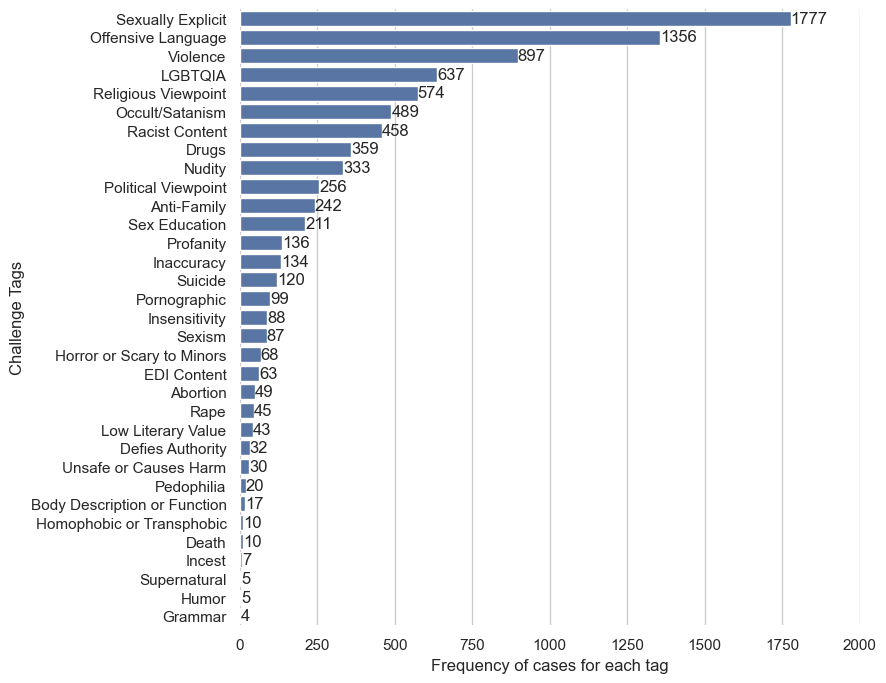

In [29]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(8,8))

palette_color = sns.color_palette('pastel') 
ax = sns.barplot(x=counts, y=challenge_tags, data=counts_df, order = counts_df.sort_values('Count', ascending=False).ChallengeTag)

ax.set(xlim=(0, 2000), ylabel="Challenge Tags",
       xlabel="Frequency of cases for each tag")
sns.despine(left=True, bottom=True)

for i in ax.containers:
    ax.bar_label(i,)

plt.savefig('3-5b.png', bbox_inches='tight')
plt.show()